In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from stats import Stats

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Loaded /home/d/patches//cylinder1/ in 0.00222587585449 seconds.
Using test set: ['image', 'prob', 'merged_array', 'larger_border_overlap']

Precision/Recall:
             precision    recall  f1-score   support

          0       0.91      0.90      0.91     13408
          1       0.91      0.91      0.91     13408

avg / total       0.91      0.91      0.91     26816

Test Accuracy: 0.908189140811
Accuracy Score: 0.908189140811


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


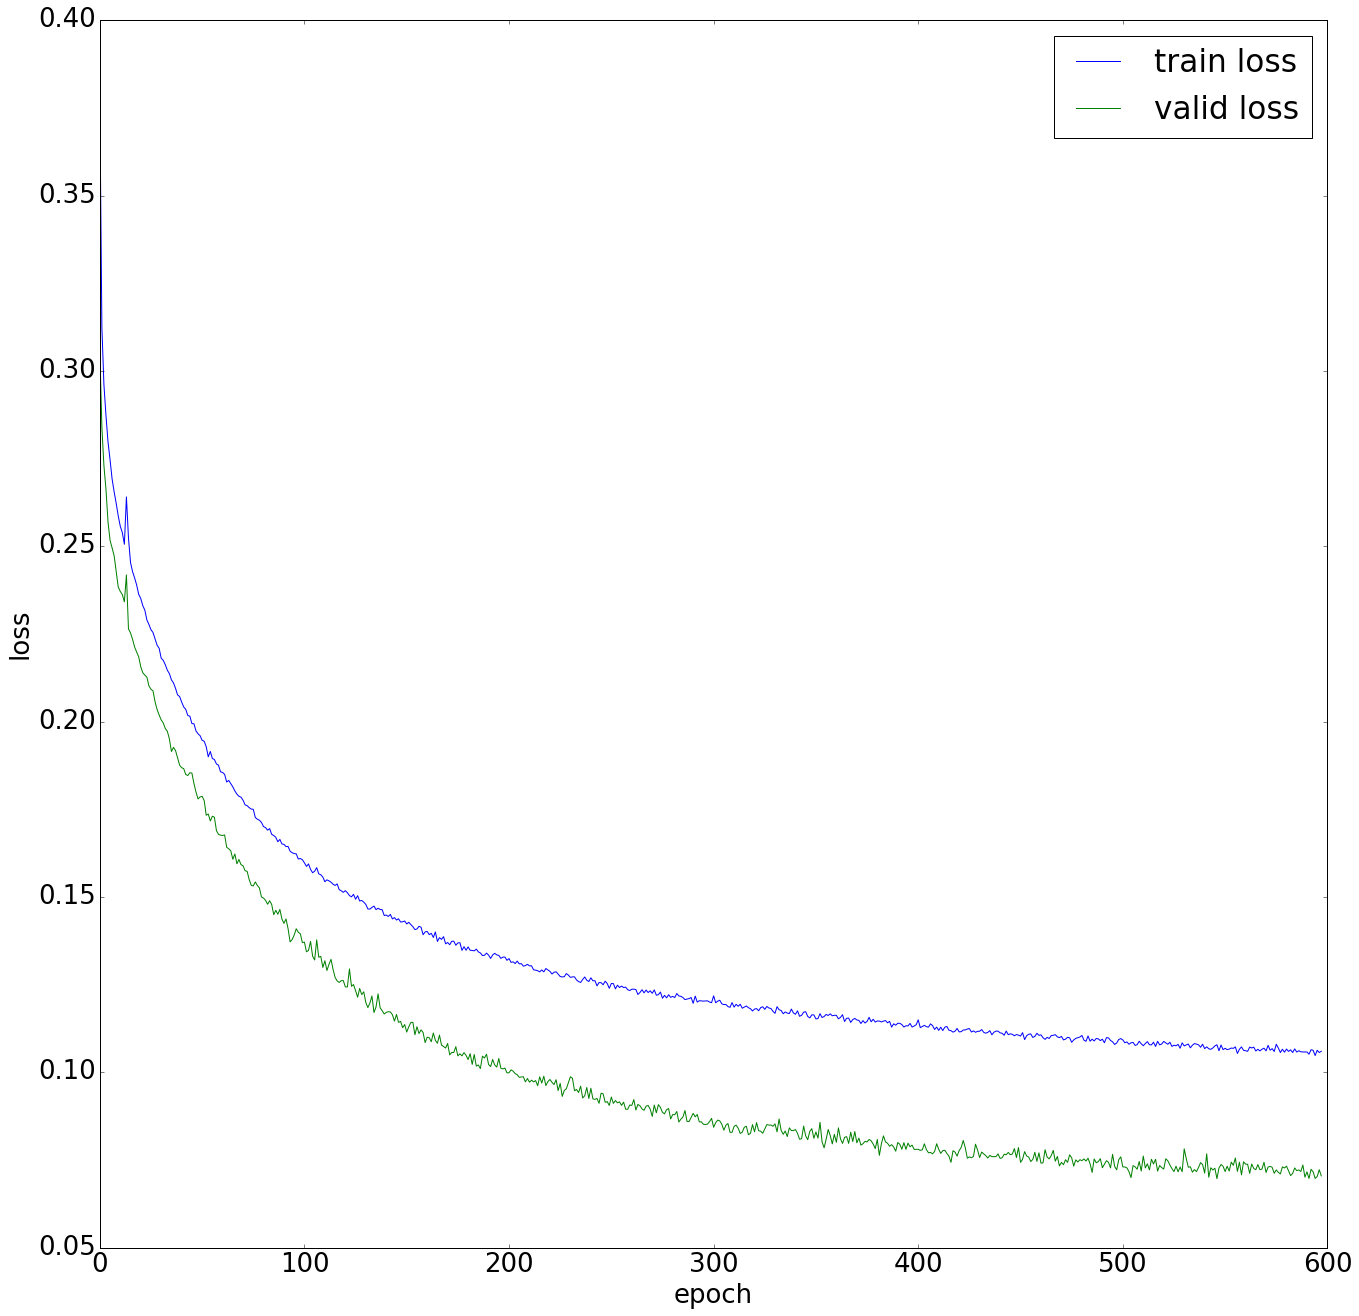

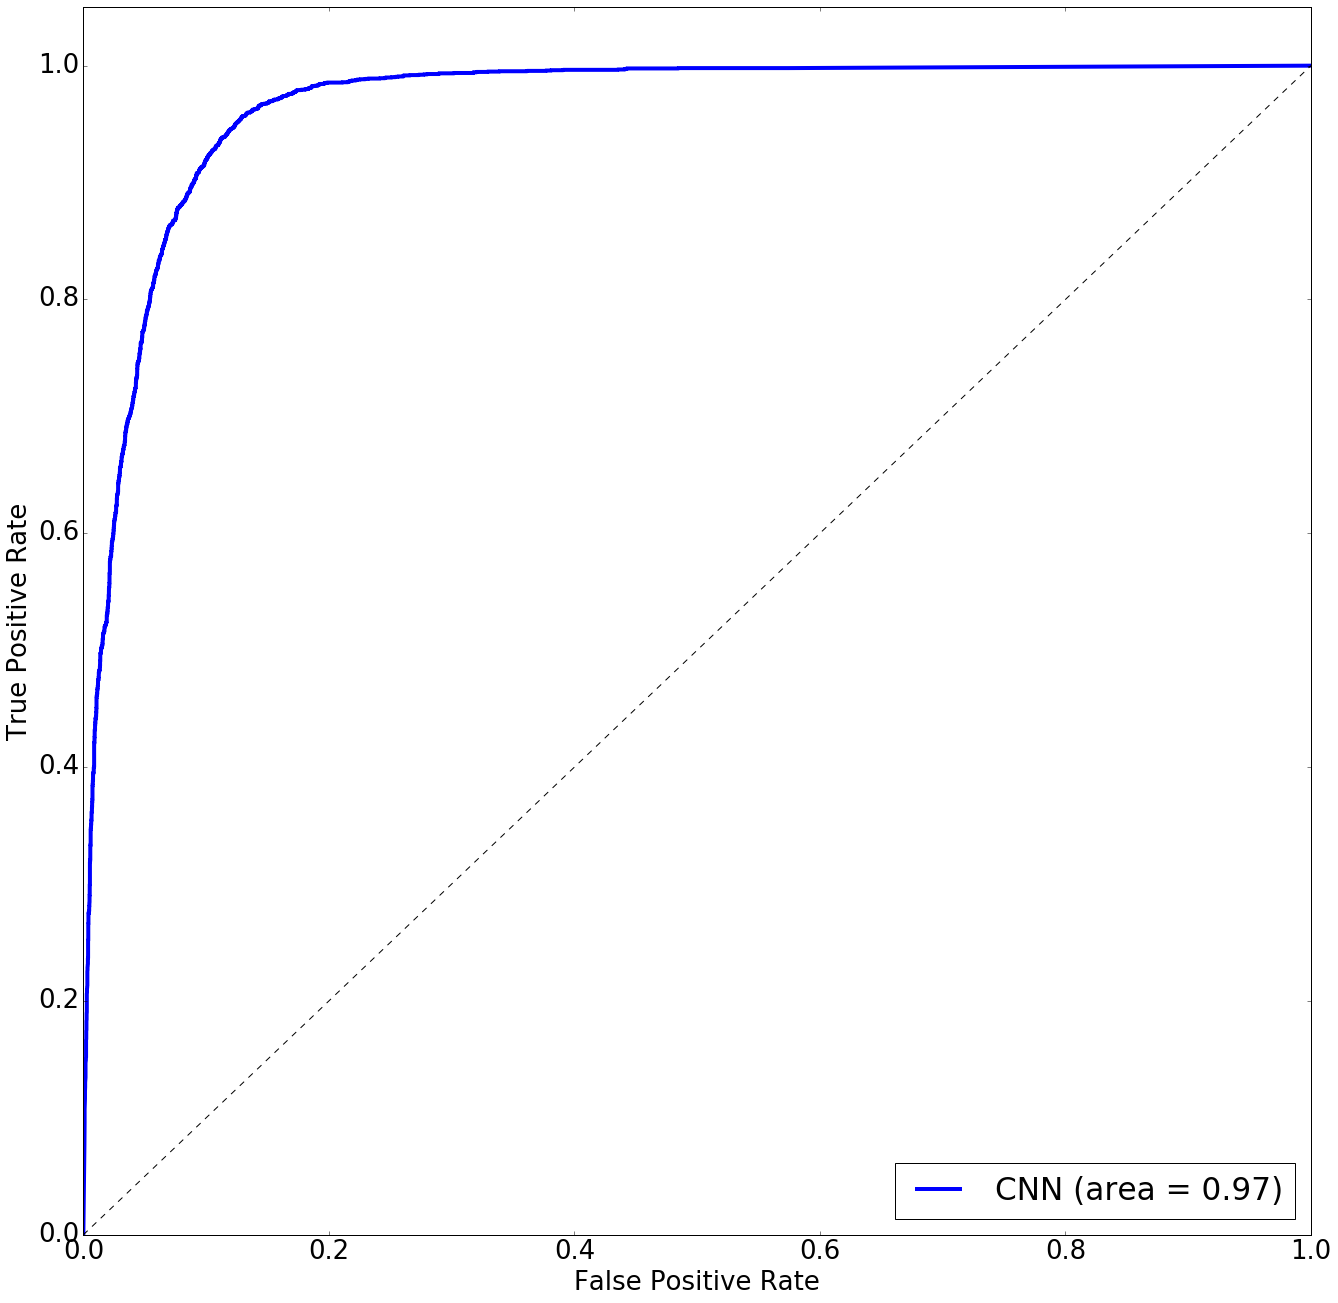

In [3]:
cnn1 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars/net.p'
cnn2 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn3 = '/home/d/nets/MergeNetThreeLegDropout_cylinder1_larger_border_overlap_dropout_usevars/net.p'
cnn4 = '/home/d/nets/MergeNetDropout_cylinder1_border_overlap_dropout_usevars_LargerDropout/net.p'
cnn5 = '/home/d/nets/MergeNetDropout_cylinder1_larger_border_overlap_dropout_usevars_LargerDropout/net.p'
cnn6 = '/home/d/nets/MergeNetThreeLeg_LargerDropout/net.p'

cnn = Stats.load_cnn(cnn5)

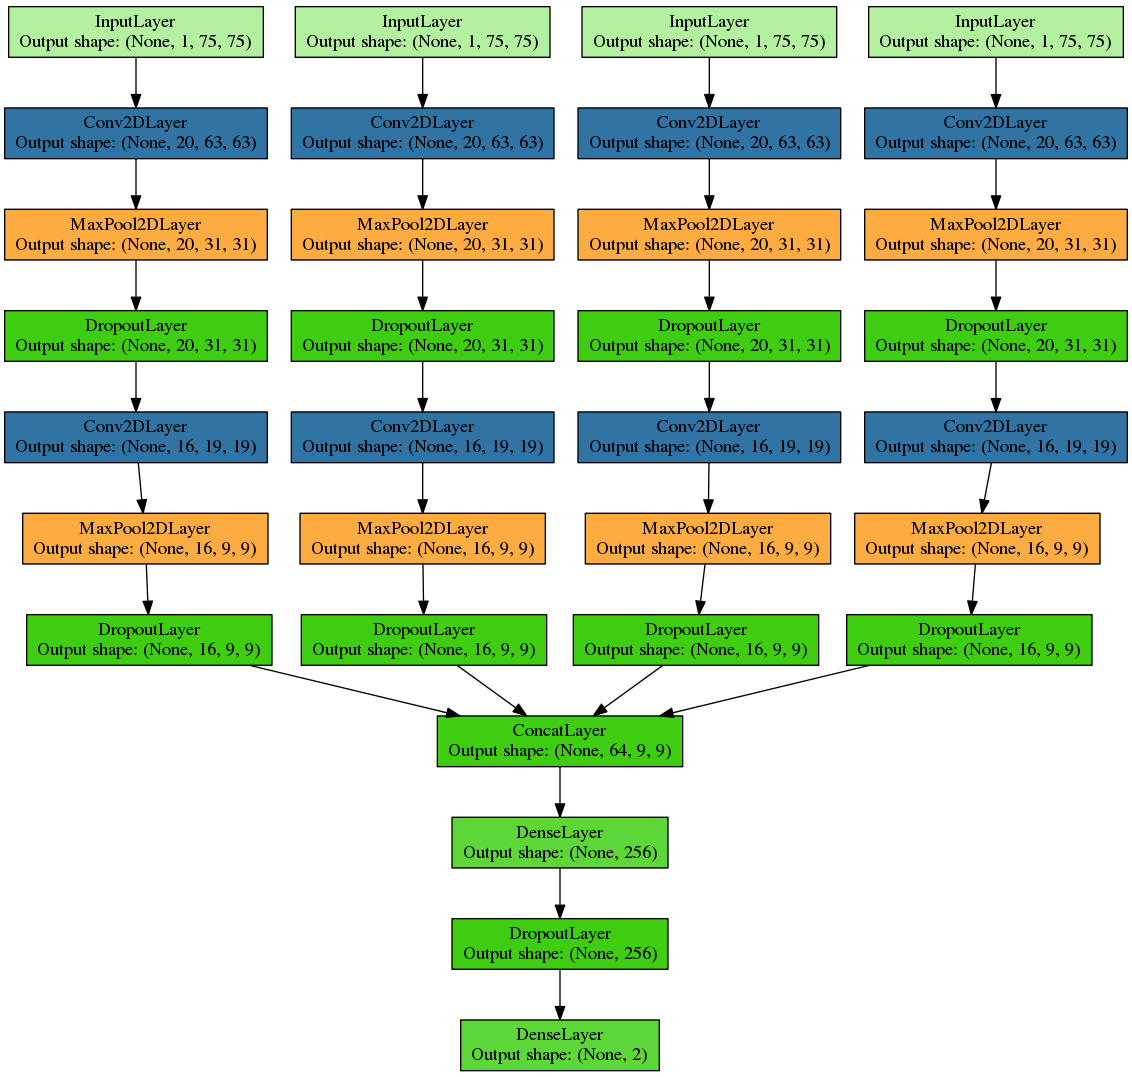

In [4]:
nolearn.lasagne.visualize.draw_to_notebook(cnn)

Loading merge errors from file..
16  merge errors found.
Loading dojo bigM from file..

Loading merge errors p < .05 and split errors p > .95 from file..
   Mean VI improvement 0.0372060493096
   Median VI improvement 0.0198939062451

Loading merge errors p < .01 and split errors p > .99 from file..
   Mean VI improvement 0.043780660774
   Median VI improvement 0.0553753246832

Loading merge errors and split errors (simulated user) from file..
   Mean VI improvement 0.113461280938
   Median VI improvement 0.0767676297577

Loading merge errors and split errors (simulated user) with error rates from file..


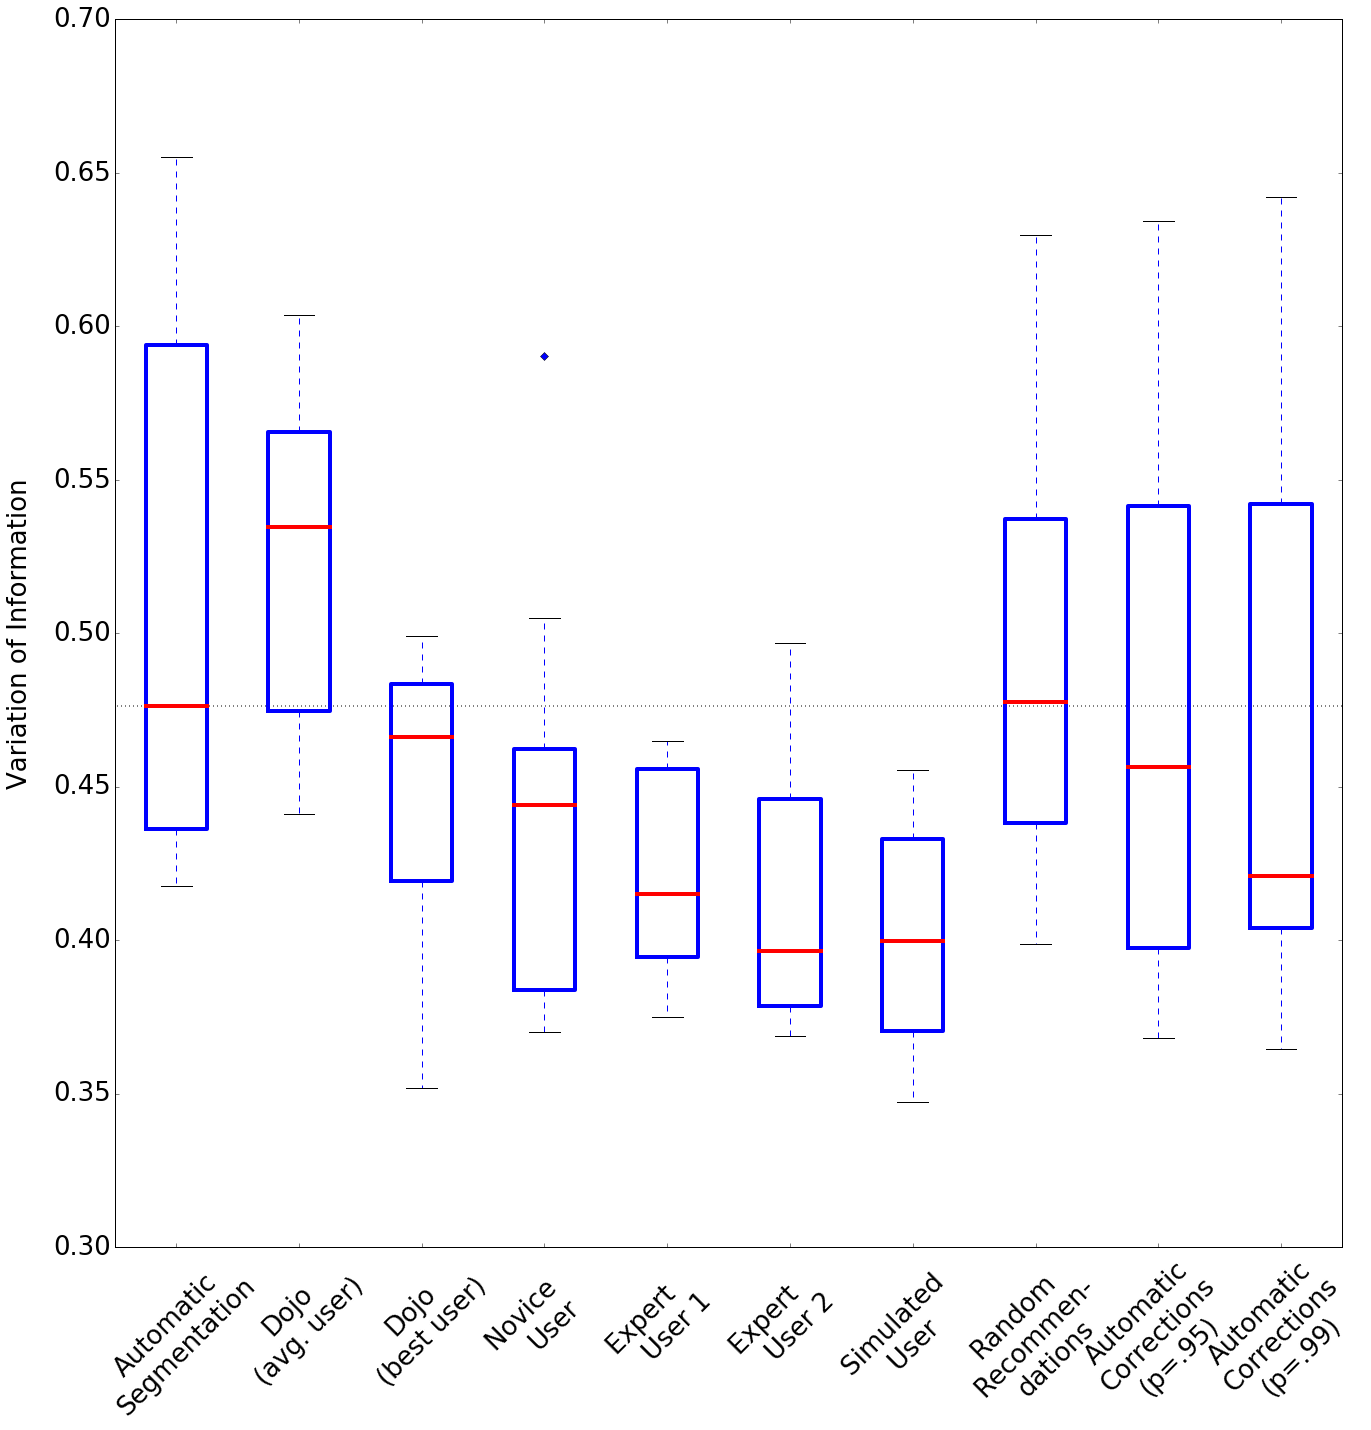

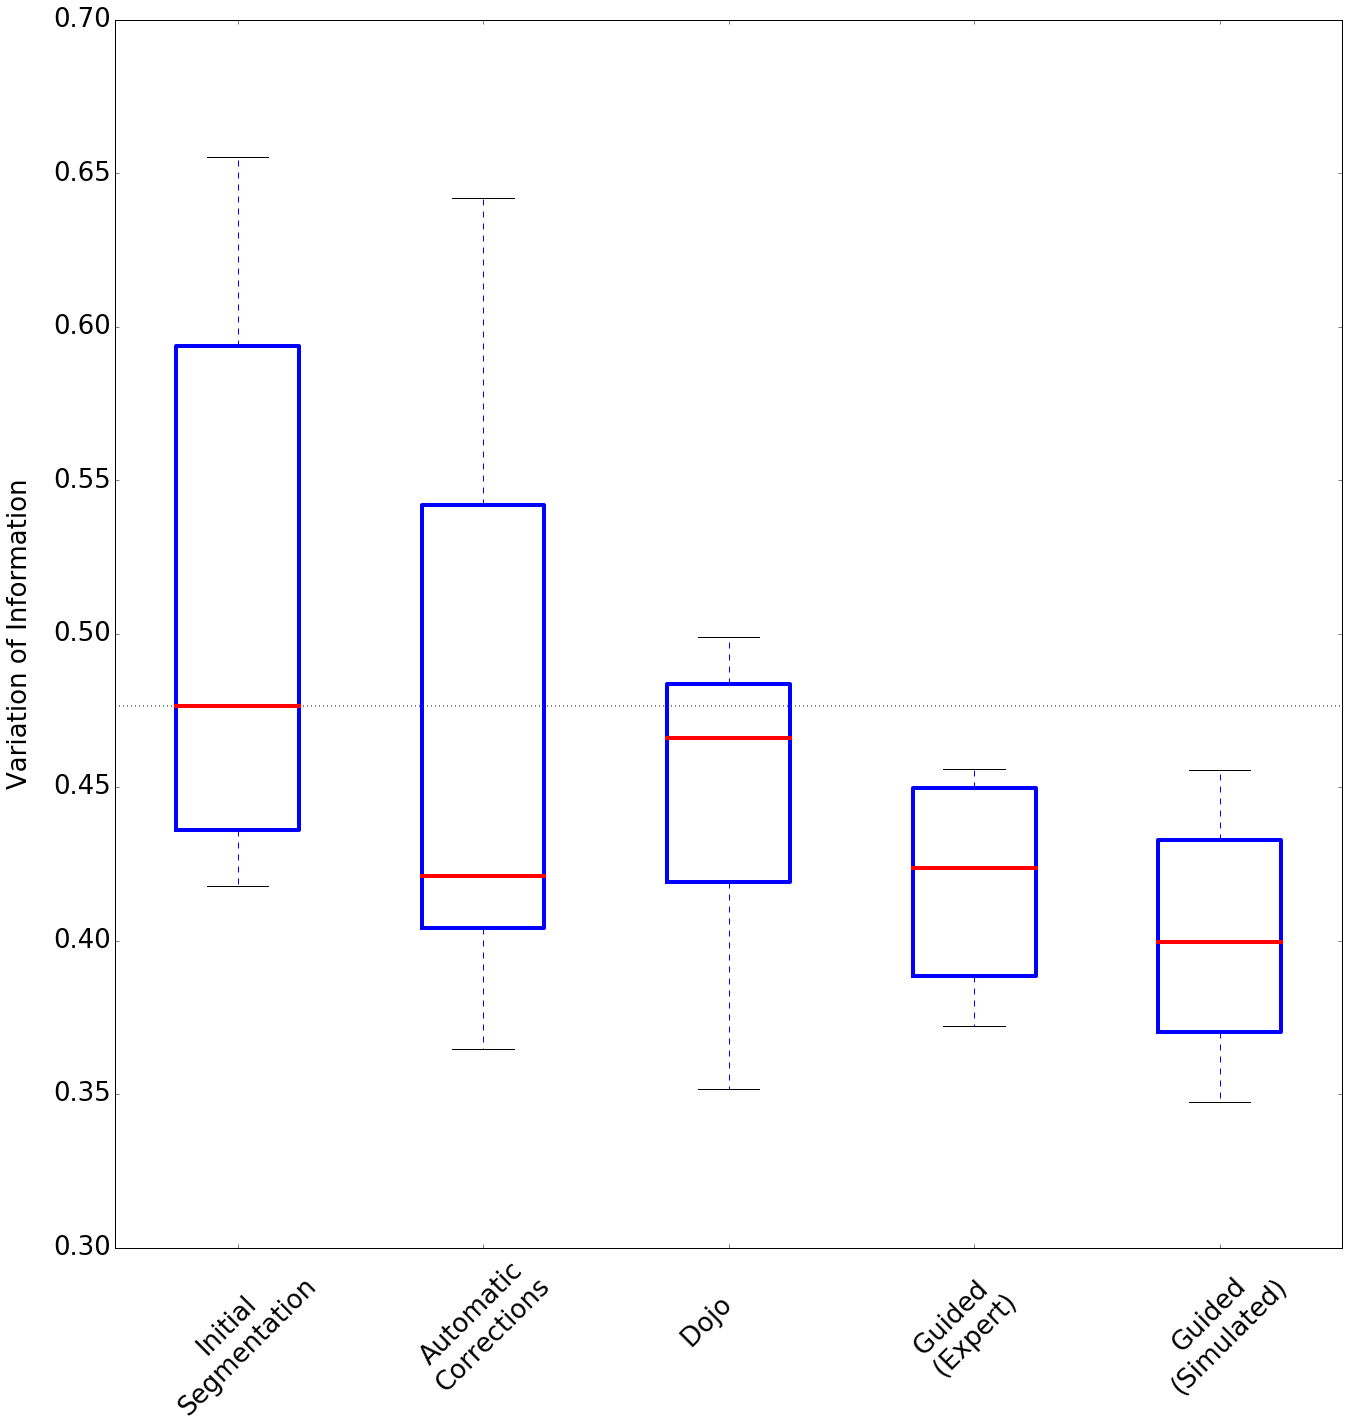

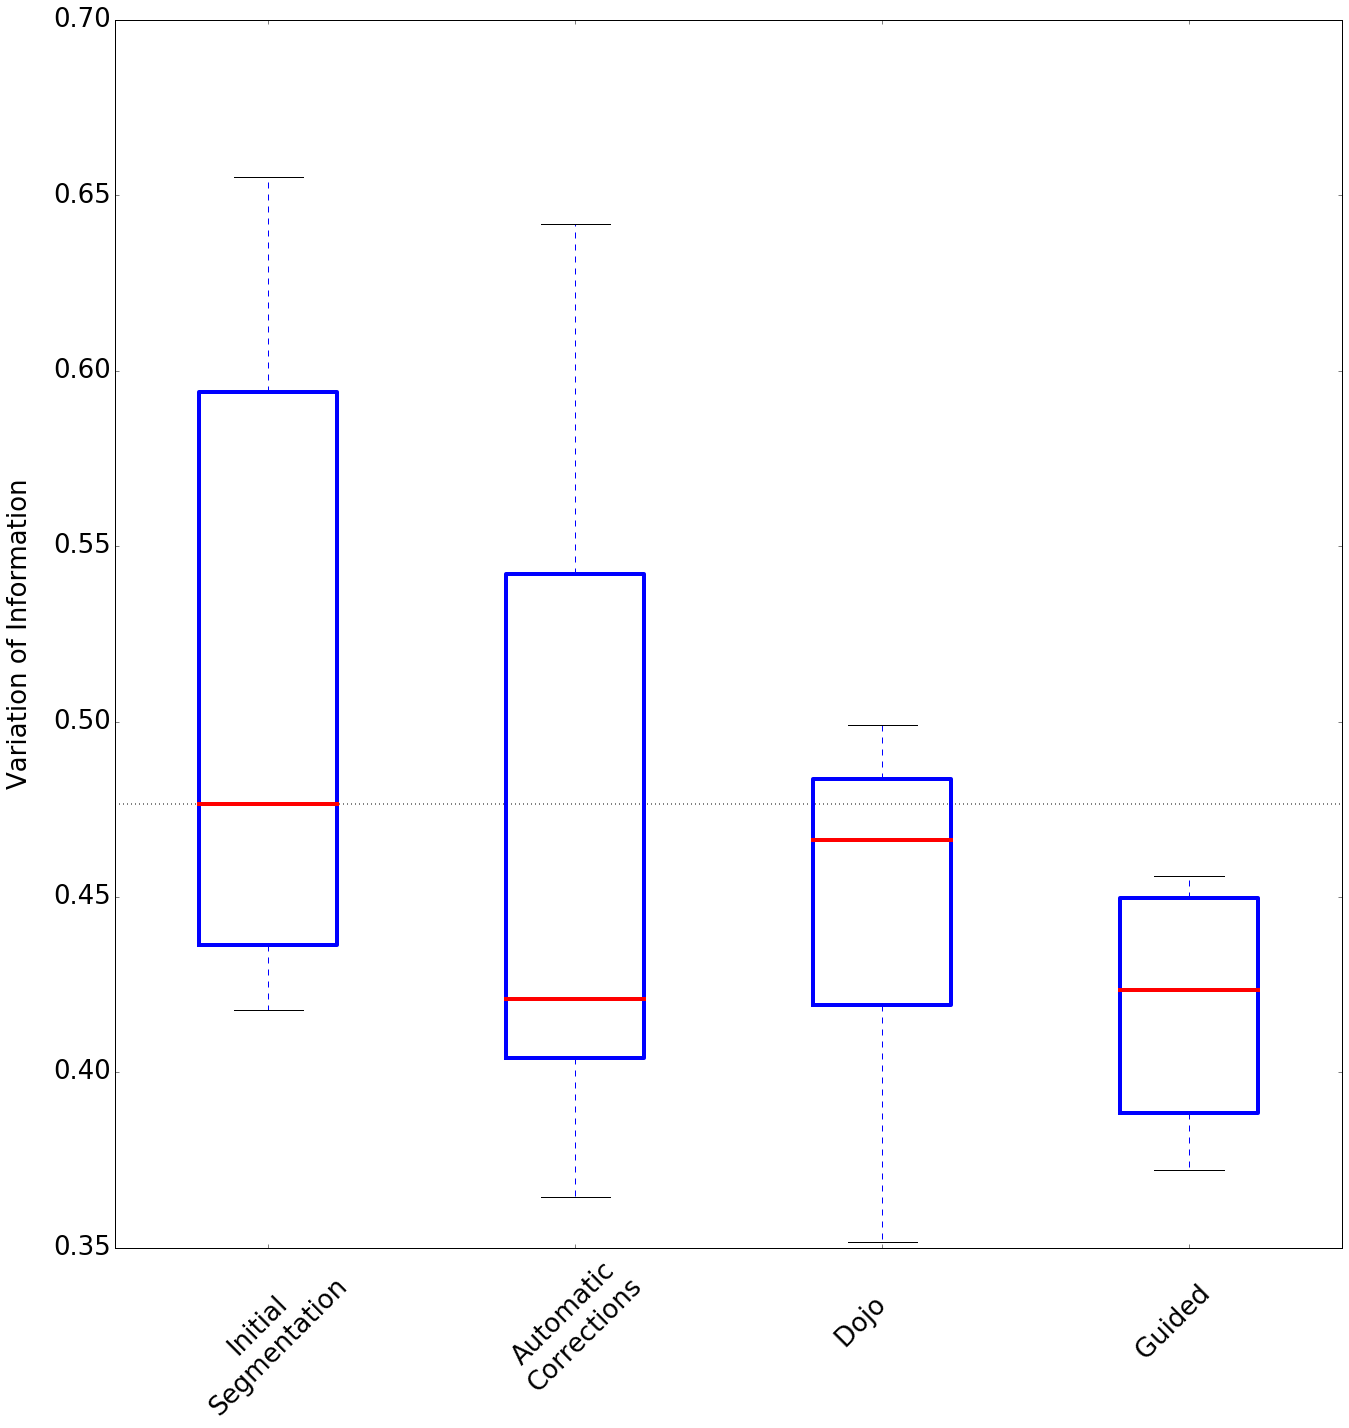

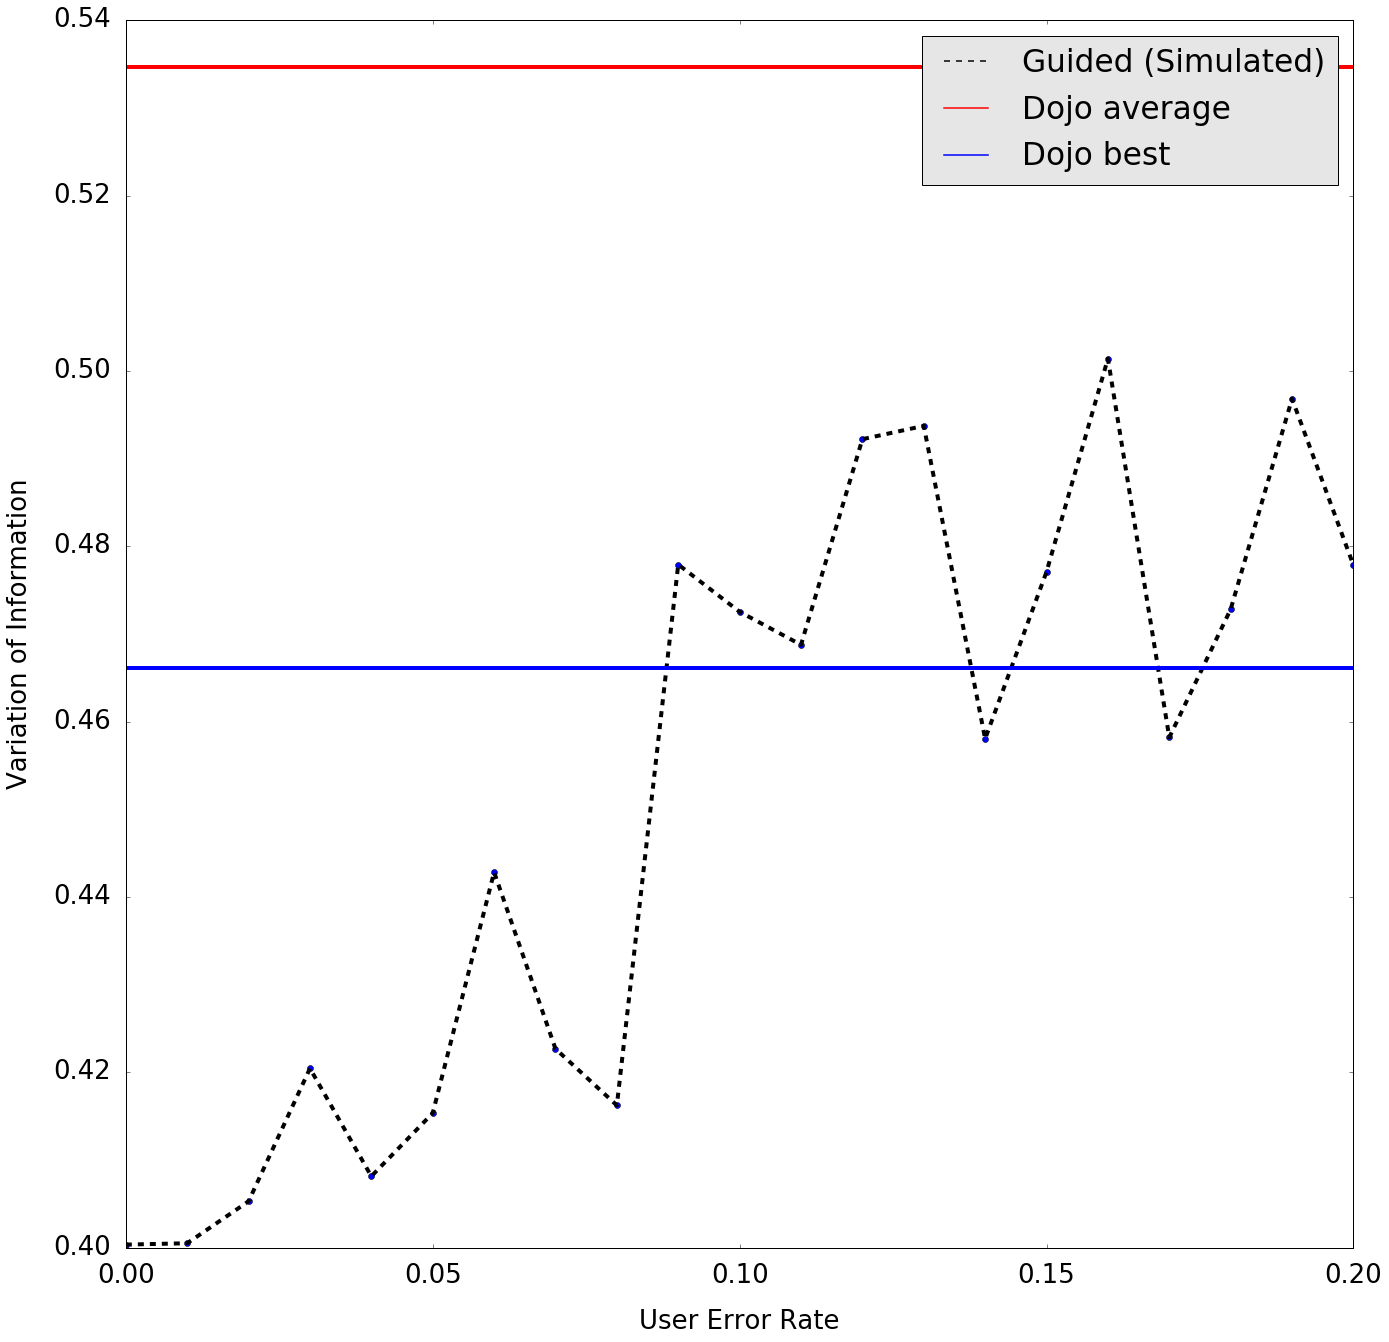

In [ ]:
Stats.run_dojo_xp(cnn)

In [ ]:
fixes, vis = Stats.run_cylinder_xp(cnn)